In [86]:
import torch
from training_part.model_loader import SPRDiffusionModel
import training_part.diffusers.src.diffusers as diffusers
from tqdm import tqdm
from PIL import Image

In [60]:
checkpoint_path = "/home/djmoon/workspace/01_spr/generative_01/20240906_115609_batch2_epochs100/lightning_logs/version_0/checkpoints/epoch=91-step=4324-train_loss=0.0128.ckpt"
model = SPRDiffusionModel.load_from_checkpoint(checkpoint_path, lr=0.001, num_class_embeds=2)

scheduler = diffusers.schedulers.DDPMScheduler()

batch_size=4
device = "cuda"
# steps = torch.randint(scheduler.config.num_train_timesteps, (batch_size, ), device=device)
steps = torch.zeros((batch_size, ), device=device)
noise = torch.randn((batch_size, 3, 240, 320))

In [61]:
num_plates = 2
types = 0
tensor = torch.Tensor([[num_plates, types]])
conditions = torch.concat([tensor] * batch_size, axis=0)
conditions = conditions.to(device)

conditions.size()

torch.Size([4, 2])

In [78]:
model.eval()

scheduler.set_timesteps(1000)
noise = noise.to(device)

for t in tqdm(scheduler.timesteps):    
    with torch.no_grad():  
        t = t.to(device)
        outputs = model.model(noise, t, conditions)
        noise = scheduler.step(outputs.sample, t, noise).prev_sample

100%|██████████| 1000/1000 [40:24<00:00,  2.42s/it]


In [79]:
noise

tensor([[[[ 0.0538,  0.0409, -0.0432,  ..., -0.0397, -0.0626,  0.3847],
          [-0.1502,  0.1030,  0.1335,  ..., -0.0194,  0.4926, -0.0439],
          [ 0.0017,  0.1879,  0.0218,  ...,  0.2768,  0.0018,  0.0190],
          ...,
          [-0.1037,  0.1657, -0.3160,  ...,  0.1576,  0.2964,  0.1192],
          [ 0.1004, -0.0954, -0.3008,  ...,  0.1902,  0.5122, -0.0937],
          [ 0.0522,  0.0667,  0.1096,  ..., -0.0546,  0.7192,  0.2662]],

         [[ 0.9841, -0.1817, -0.0782,  ...,  0.2103, -0.2906, -0.1360],
          [ 0.0596,  0.2773, -0.0453,  ..., -0.2947, -0.4015,  0.1929],
          [-0.2911, -0.8671, -0.0793,  ..., -0.5588,  0.1155,  0.0910],
          ...,
          [ 0.2744, -0.0735, -0.4399,  ..., -0.3347, -0.5785, -0.1016],
          [-0.6814,  0.4856, -0.4681,  ...,  0.1452, -0.1952,  0.0756],
          [-0.4235, -0.4473, -0.3240,  ..., -0.5266, -0.6060,  0.8441]],

         [[ 0.2510,  0.1707,  0.0822,  ..., -0.1804,  0.7701,  0.1135],
          [-0.5006, -0.3646,  

In [82]:
noise.min(), noise.max()

(tensor(-1., device='cuda:0'), tensor(1., device='cuda:0'))

In [83]:
image = (noise / 2 + 0.5).clamp(0, 1)

In [84]:
image

tensor([[[[0.5269, 0.5205, 0.4784,  ..., 0.4802, 0.4687, 0.6924],
          [0.4249, 0.5515, 0.5668,  ..., 0.4903, 0.7463, 0.4781],
          [0.5008, 0.5940, 0.5109,  ..., 0.6384, 0.5009, 0.5095],
          ...,
          [0.4481, 0.5828, 0.3420,  ..., 0.5788, 0.6482, 0.5596],
          [0.5502, 0.4523, 0.3496,  ..., 0.5951, 0.7561, 0.4531],
          [0.5261, 0.5333, 0.5548,  ..., 0.4727, 0.8596, 0.6331]],

         [[0.9920, 0.4092, 0.4609,  ..., 0.6051, 0.3547, 0.4320],
          [0.5298, 0.6387, 0.4773,  ..., 0.3526, 0.2993, 0.5965],
          [0.3545, 0.0664, 0.4604,  ..., 0.2206, 0.5578, 0.5455],
          ...,
          [0.6372, 0.4632, 0.2801,  ..., 0.3326, 0.2107, 0.4492],
          [0.1593, 0.7428, 0.2659,  ..., 0.5726, 0.4024, 0.5378],
          [0.2883, 0.2764, 0.3380,  ..., 0.2367, 0.1970, 0.9221]],

         [[0.6255, 0.5853, 0.5411,  ..., 0.4098, 0.8851, 0.5568],
          [0.2497, 0.3177, 0.7028,  ..., 0.4357, 0.9310, 0.4607],
          [0.6588, 0.8924, 0.6268,  ..., 0

In [85]:
image = image.cpu().permute(0, 2, 3, 1).numpy()

In [89]:
pil_images = [Image.fromarray((img * 255).round().astype("uint8")) for img in image]

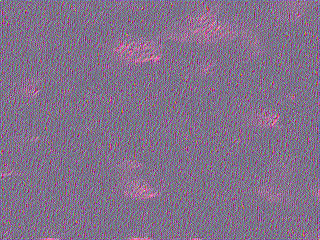

In [90]:
pil_images[0]

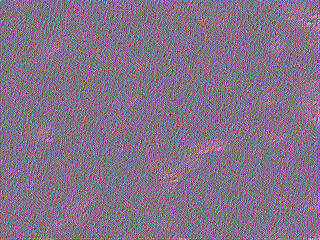

In [91]:
pil_images[1]

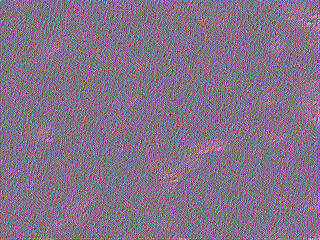

In [95]:
pil_images[1]

In [98]:
torch.cuda.is_available()

True